# Foundation of AI Search Algorithms

## Basic Data Structure : Stack

In [1]:
class Stack:
    
    def __init__(self):
        self.stack = []
        
    def isEmpty(self):
        if len(self.stack) <= 0:
            return True
        else:
            return False
        
    def push(self, element):
        self.stack.append(element)
        
    def pop(self):
        return self.stack.pop()

In [2]:
s = Stack()

s.push(4)
s.push(10)
s.push(3)

In [3]:
print(s.stack)

[4, 10, 3]


In [4]:
s.pop()
print(s.stack)

[4, 10]


# Queue

In [5]:
class Queue:
    
    def __init__(self):
        self.queue = []
        
    def isEmpty(self):
        if len(self.queue) <= 0:
            return True
        else:
            return False
        
    def enqueue(self, element):
        self.queue.append(element)
        
    def dequeue(self):
        element = self.queue[0:1]
        del self.queue[0]
        return element

In [6]:
q = Queue()

q.enqueue(8)
q.enqueue(2)
q.enqueue(7)
q.enqueue(1)
q.enqueue(5)
q.enqueue(3)

In [7]:
print(q.queue)

[8, 2, 7, 1, 5, 3]


In [8]:
q.dequeue()
print(q.queue)

[2, 7, 1, 5, 3]


# Graph

In [23]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

class Graph:
    def __init__(self, maxNodes):
        self.maxNodex = maxNodes
        self.nodes = []
        self.edges = np.array([[0] * maxNodes] * maxNodes)
    
    def addNode(self, node):
        if len(self.nodes) >= 5:
            print('Max no. of nodes reached.')
        else:
            self.nodes.append(node)
        
    def addEdge(self, frm, to, weight):      
        fromIndex = self.nodes.index(frm)
        toIndex = self.nodes.index(to)
        
        self.edges[fromIndex][toIndex] = weight
    
    def successor(self, frm):
        succ = []
        
        fromIndex = self.nodes.index(frm)
        
        for idx, value in np.ndenumerate(self.edges[fromIndex]):
            if value > 0:
                succ.append(self.nodes[idx[0]])
        return succ
    
    def predecessor(self, to):
        pred = []
        
        toIndex = self.nodes.index(to)
        
        for idx, value in np.ndenumerate(self.edges[:,toIndex]):
            if value > 0:
                pred.append(self.nodes[idx[0]])
        return pred
    
    # Reference: 
    # https://networkx.org/documentation/stable/auto_examples/drawing/plot_weighted_graph.html
    def plotGraph(self):
        g = nx.DiGraph()
        for frmNode in self.nodes:
            frmIdx = self.nodes.index(frmNode)
            for toNode in self.nodes:                
                toIdx = self.nodes.index(toNode)
                if self.edges[frmIdx][toIdx] > 0:
                    g.add_edge(frmNode, 
                               toNode, 
                               weight = self.edges[frmIdx][toIdx])
        
        pos = nx.spring_layout(g)  # positions for all nodes

        # nodes
        nx.draw_networkx_nodes(g, 
                               pos, 
                               node_size=700)

        # edges
        nx.draw_networkx_edges(g, 
                               pos, 
                               width=3,
                               connectionstyle='arc3, rad = 0.1')

        # node labels
        nx.draw_networkx_labels(g, 
                                pos, 
                                font_size=20, 
                                font_family="sans-serif")
        # edge weight labels
        edge_labels = nx.get_edge_attributes(g, "weight")
        nx.draw_networkx_edge_labels(g, 
                                     pos, 
                                     edge_labels)

        ax = plt.gca()
        ax.margins(0.08)
        plt.axis("off")
        plt.tight_layout()
        plt.show()

In [26]:
g = Graph(5)

g.addNode("Kathmandu")
g.addNode("Lalitpur")
g.addNode("Bhaktpur")
g.addNode("Nuwakot")
g.addNode("Dhadhing")

g.addEdge("Kathmandu", "Lalitpur", 10)
g.addEdge("Kathmandu", "Bhaktpur", 30)
g.addEdge("Kathmandu", "Dhadhing", 60)
g.addEdge("Lalitpur", "Bhaktpur", 20)
g.addEdge("Dhadhing", "Nuwakot", 50)

print(g.nodes)
print(g.edges)

['Kathmandu', 'Lalitpur', 'Bhaktpur', 'Nuwakot', 'Dhadhing']
[[ 0 10 30  0 60]
 [ 0  0 20  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0 50  0]]


In [27]:
g.successor("Kathmandu")
g.predecessor("Nuwakot")

['Dhadhing']

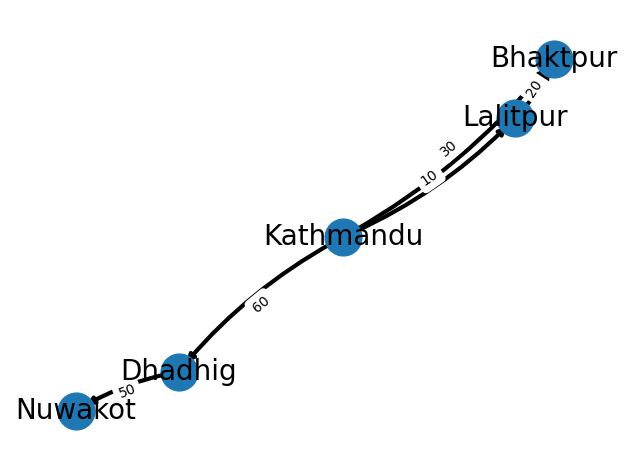

In [21]:
g.plotGraph()